# Support vector regression
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

Here is the nice article how support vector method can also be used for regression.

https://www.saedsayad.com/support_vector_machine_reg.htm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### A simple nonlinear function
The aim is to create some synthetic data which is not very amenable for linear regression models. We will show how a Support Vector regressor enhances the predictive performance.

In [2]:
def nonlinear(array):
    return (10*array[:,0]-np.exp(0.01*array[:,1]+np.log(1+array[:,2]**2)))/(array[:,3]**2+5)

### Generate features and target data for regression

In [3]:
n_samples = 200
n_features = 4

In [4]:
x = 5*np.random.rand(n_samples,n_features)

In [5]:
y = nonlinear(x)+np.random.randn(n_samples)

In [6]:
y=y.reshape(n_samples,1)

In [7]:
df = pd.DataFrame(data=np.hstack((x,y)),columns=['X1','X2','X3','X4','y'])

In [8]:
df.head()

,X1,X2,X3,X4,y
0,0.818477,4.027099,1.131048,0.024221,2.540776
1,1.250933,1.458881,0.978987,0.903619,2.602005
2,4.878818,4.814252,1.773927,1.382003,4.243708
3,4.770039,2.108497,1.250745,2.135227,3.721822
4,3.315885,4.742257,1.846138,3.843564,1.268514


### Plotting the data

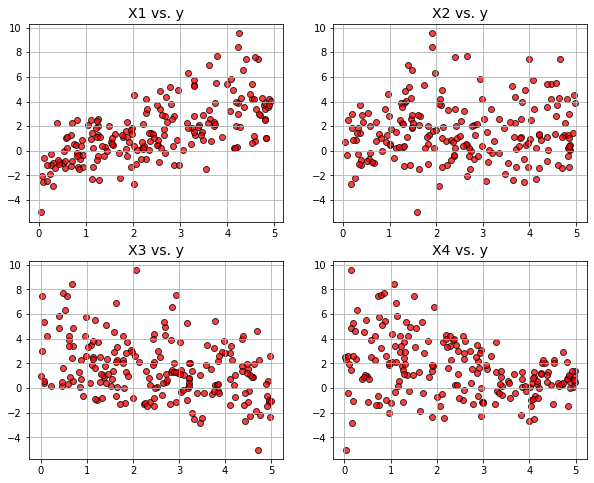

In [9]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(df[df.columns[i]],df['y'],edgecolor='k',color='red',alpha=0.75)
    ax[i].set_title(f"{df.columns[i]} vs. y",fontsize=14)
    ax[i].grid(True)
plt.show()

### Test/train split

In [10]:
X = df[['X1','X2','X3','X4']]
y = df['y']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Support vector regressor with linear kernel

Here is scikit-learn's SVR doc: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [13]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Test score

In [14]:
svr_linear.score(X_test,y_test)

0.5039103904226544

### Linear regression as a baseline

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linear = LinearRegression()

In [17]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
linear.score(X_test,y_test)

0.5131204583471316

### Support vector regressor with Gaussian (radial basis function) kernel

In [19]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
svr_rbf.score(X_test,y_test)

0.6473177483091139

So, clearly, the RBF kernel showed better accuracy on the test set

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(X_test))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_rbf.predict(X_test))))

RMSE for linear SVR: 1.442957827502489
RMSE for RBF kernelized SVR: 1.2166492012822947


### We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}

In [25]:
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)

In [26]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished
c:\program files\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

### Check which was deemed best estimator by the grid search

In [27]:
grid.best_estimator_

SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Fit that estimator to the data and see

In [29]:
svr_best=SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.5)
svr_best.fit(X_train, y_train)

SVR(C=5.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
svr_best.score(X_test,y_test)

0.6776661577094625

In [31]:
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))

RMSE for RBF kernelized SVR: 1.163125361525394
